<a href="https://colab.research.google.com/github/anuj0456/deep_learning_for_coders/blob/master/practice/view_layers_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import Xception, VGG16, VGG19,ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2, InceptionV3, InceptionResNetV2,MobileNet,MobileNetV2,DenseNet121, DenseNet169,DenseNet201, NASNetMobile,NASNetLarge, EfficientNetB0,EfficientNetB1, EfficientNetB2,EfficientNetB3, EfficientNetB4,EfficientNetB5, EfficientNetB6,EfficientNetB7


In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import models
import matplotlib.pyplot as plt

In [ ]:
layers = 5
IMG_SIZE = 224
image_path1 = '/content/dog.jpg'
image_path2 = '/content/cat.jpg'
y = [0,1]
y = tf.keras.utils.to_categorical(y)
y.shape

(2, 2)

In [ ]:
img_tensor = []
import cv2
from keras.preprocessing import image 
def process_img(image_path):
  img = cv2.imread(image_path)
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  return img
  # img = image.load_img(image_path, target_size = (IMG_SIZE, IMG_SIZE)) 
  # img_t = image.img_to_array(img) 
  # img_t = np.expand_dims(img_t, axis = 1) 
  # img_t = img_t / 255.
  # return img_t
img_tensor.append(process_img(image_path1))
img_tensor.append(process_img(image_path2))

x = np.array(img_tensor, np.float32) / 255

In [ ]:
x.shape

(2, 224, 224, 3)

In [ ]:
def output(classifier, activations):
  layer_names = []
  for layer in classifier.layers:
      layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
      
  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    if 'input' not in layer_name:
      n_features = layer_activation.shape[-1] # Number of features in the feature map
      size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
      n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                              :, :,
                                              col * images_per_row + row]
              channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, # Displays the grid
                          row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      if scale * display_grid.shape[0] == 0:
        plt.figure(figsize=(scale * display_grid.shape[1], 1))
      else:
        plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=30, 
                                width_shift_range=0.1, 
                                height_shift_range=0.1,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                )
train_gen.fit(x)

In [ ]:
# from keras.layers import Dense, Dropout, Flatten, Input
# initial_model = VGG16(weights='imagenet', include_top=False)
# input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='image_input')
# mod = Flatten()(initial_model(input))
# # mod = Dropout(0.3)(mod)
# # mod = Dense(128, activation='relu')(mod)
# # mod = Dropout(0.5)(mod)
# mod = Dense(2, activation='softmax')(mod)
# model1 = models.Model(inputs=input, outputs=mod)
# model1.summary()
# model1.compile(loss='categorical_crossentropy', optimizer='adam')
# model1.fit(x, y, epochs = 1,)

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Input
core = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
model1 = tf.keras.Sequential(layers=core.layers[:10])
model1.add(Flatten())
# model1.add(Dropout(0.3))
model1.add(Dense(128, activation='relu'))
# model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))
# model1 = tf.keras.Sequential(model1.layers[:5])
model1.summary()
model1.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.fit(x, y, epochs = 1,)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
layer_outputs = [layer.output for layer in model1.layers[2:]] 
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)
activation_model.summary()
activations = activation_model.predict(x)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
                                                                 block1_conv1[1][0]               
______________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


MemoryError: ignored

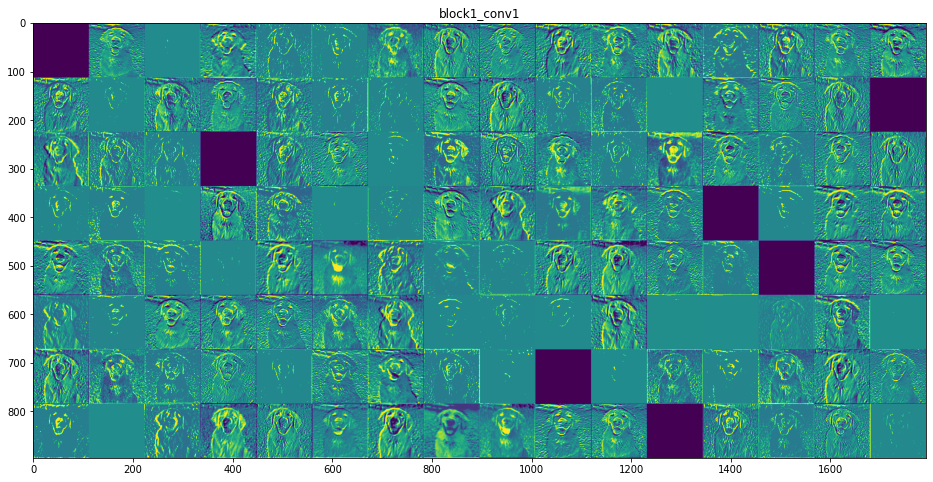

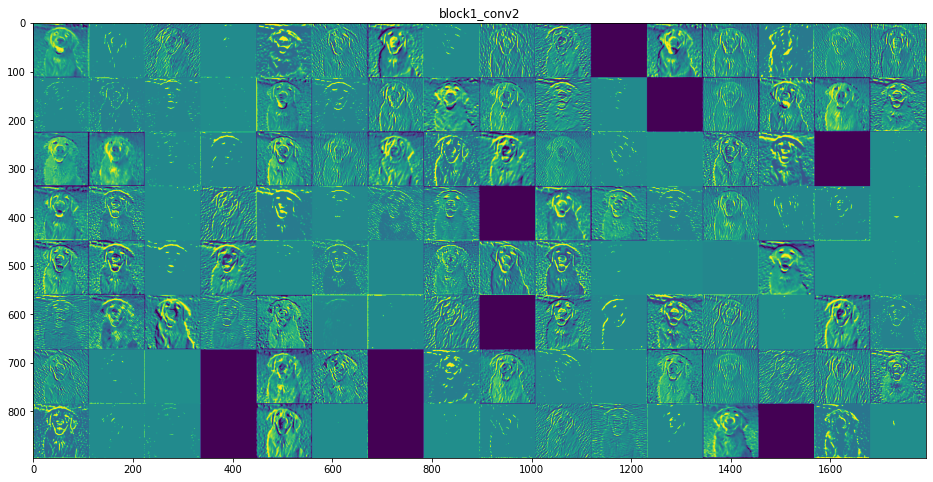

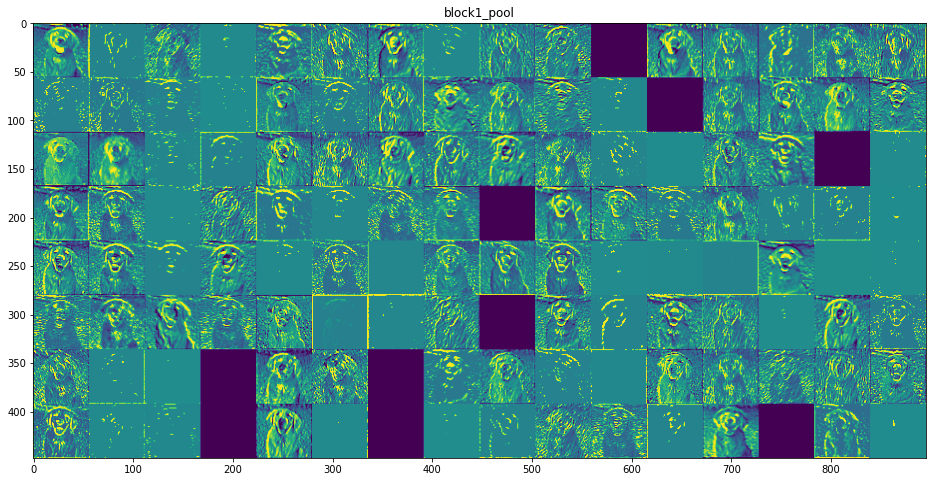

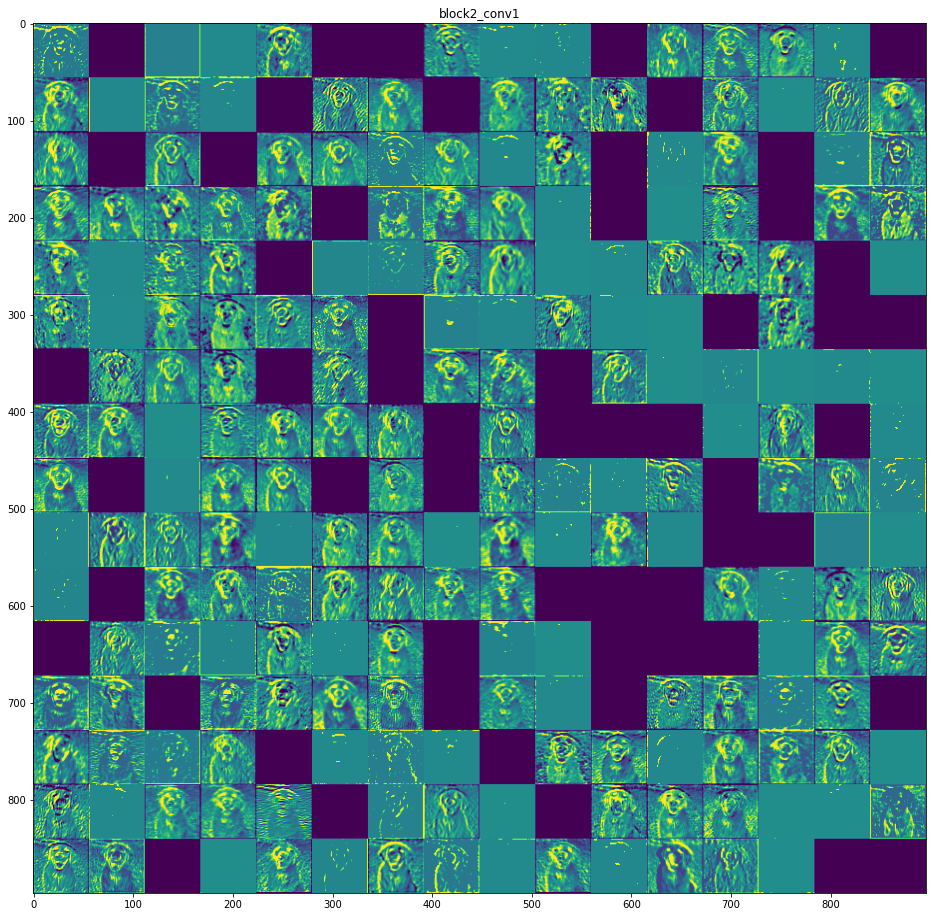

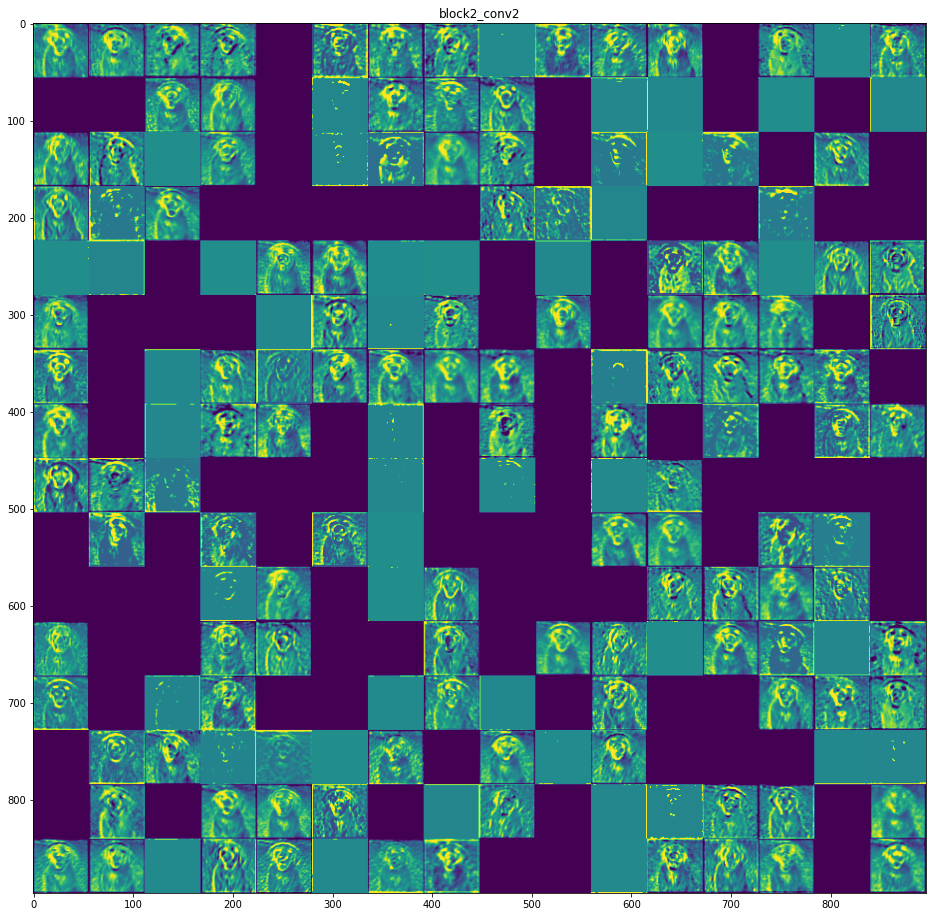

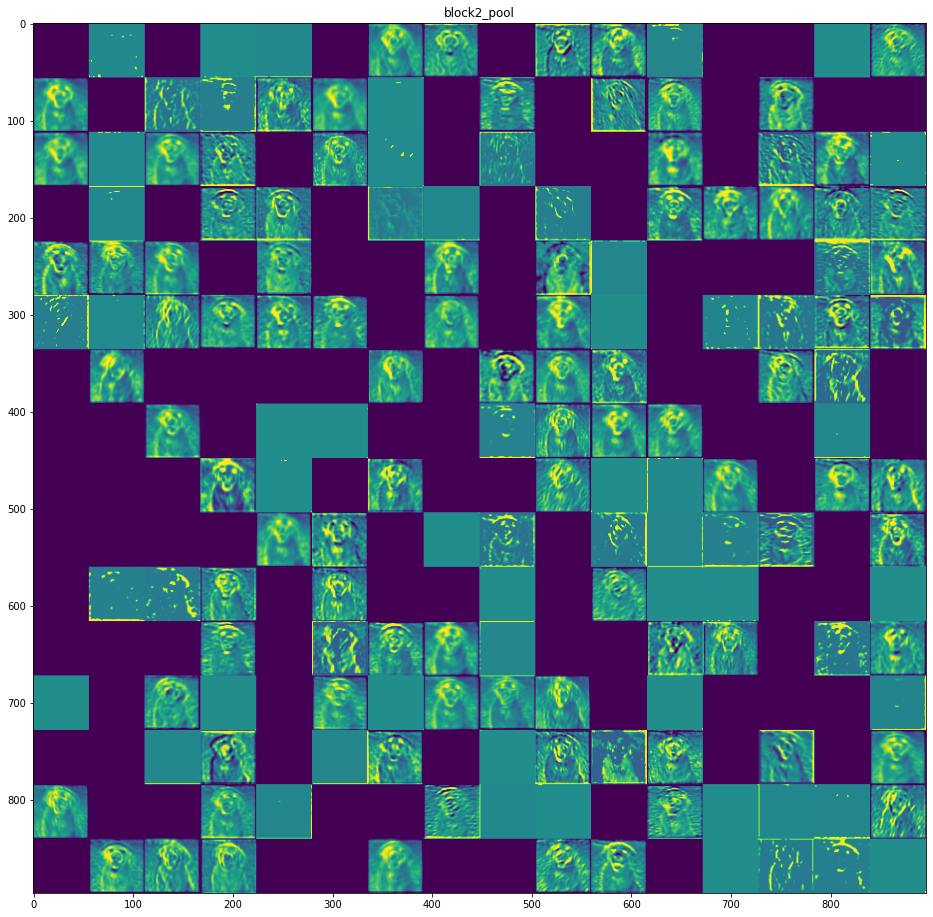

In [ ]:
output(activation_model, activations)